# COLOR MODELS

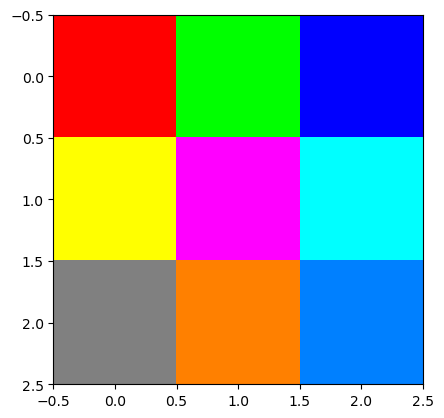

In [1]:
import numpy as np
import matplotlib.pyplot as plt



image_data = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],   # Red, Green, Blue
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]], # Yellow, Magenta, Cyan
    [[128, 128, 128], [255, 128, 0], [0, 128, 255]] # Gray, Orange, Sky Blue
], dtype=np.uint8)

plt.imshow(image_data)
plt.axis() 
plt.show()


In [2]:
def rgb_to_cmy(r, g, b): 

	c = 1 - r / 255
	m = 1 - g / 255
	y = 1 - b / 255
	return (c, m, y) 

r = 0
g = 169
b = 86

print(rgb_to_cmy(r, g, b)) 


(1.0, 0.33725490196078434, 0.6627450980392157)


# Image 1

### Extraction of each channel in RGB image

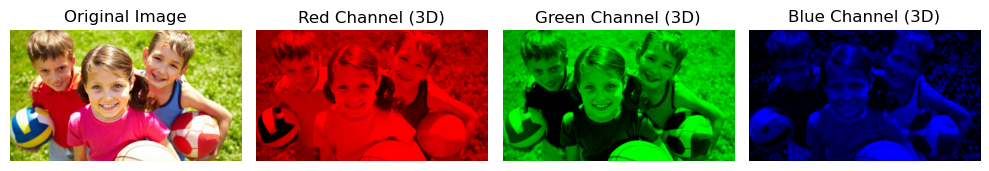

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Downloads/sports.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   
red_image = np.zeros_like(image)                                          # red_image=image_rgb.copy()
red_image[:, :, 0] = image_rgb[:, :, 0]                                    # red_image[:, :, 1] = 0
                                                                           # red_image[:, :, 2] = 0
green_image = np.zeros_like(image)  
green_image[:, :, 1] = image_rgb[:, :, 1]  

blue_image = np.zeros_like(image)  
blue_image[:, :, 2] = image_rgb[:, :, 2]  


plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(red_image)
plt.title("Red Channel (3D)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(green_image)
plt.title("Green Channel (3D)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(blue_image)
plt.title("Blue Channel (3D)")
plt.axis("off")



plt.tight_layout()
plt.show()



### Extraction of Each Channel as a Single Plane Grayscale Image


(-0.5, 769.5, 435.5, -0.5)

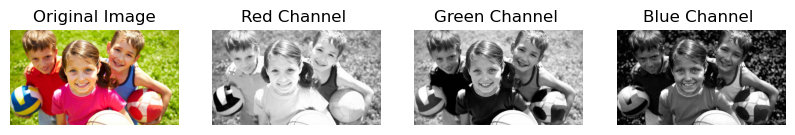

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Downloads/sports.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
red_channel = image_rgb[:, :, 0]  

green_channel = image_rgb[:, :, 1]  

blue_channel = image_rgb[:, :, 2]  

plt.figure(figsize=(10, 5))


plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(red_channel,cmap='gray')
plt.title("Red Channel ")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(green_channel,cmap='gray')
plt.title("Green Channel ")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(blue_channel,cmap='gray')
plt.title("Blue Channel ")
plt.axis("off")



### RGB to CMY Model

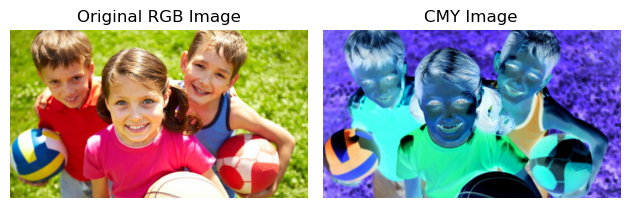

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_cmy(image):
    image = image / 255.0
    
    C = 1 - image[:, :, 2]  # Cyan = 1 - Red
    M = 1 - image[:, :, 1]  # Magenta = 1 - Green
    Y = 1 - image[:, :, 0]  # Yellow = 1 - Blue
    
    cmy_image = np.stack((C, M, Y), axis=-1)
    
    cmy_image = (cmy_image * 255).astype(np.uint8)
    
    return cmy_image

image = cv2.imread('Downloads/sports.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

cmy_image = rgb_to_cmy(image)


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cmy_image)
plt.title("CMY Image")
plt.axis("off")

plt.tight_layout()
plt.show()


### RGB to HSV Model

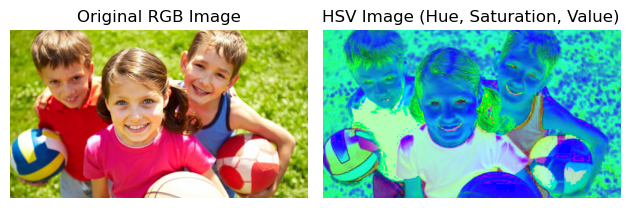

In [35]:
import cv2
import matplotlib.pyplot as plt

image_rgb = cv2.imread('Downloads/sports.jpg')
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  

image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title("HSV Image (Hue, Saturation, Value)")
plt.axis("off")

plt.tight_layout()
plt.show()


### Extraction of Hue, Saturation and Value Channels 

##### H, S, V = cv2.split(image_hsv)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(H,cmap='hsv')  
plt.title("Hue Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(S,cmap='gray') 
plt.title("Saturation Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(V,cmap='gray')  
plt.title("Value Channel")
plt.axis("off")

plt.tight_layout()
plt.show()


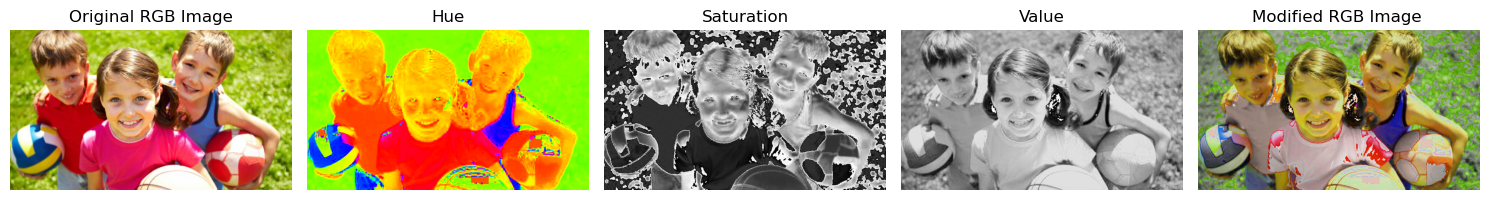

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_rgb = cv2.imread('Downloads/sports.jpg')
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB) 

image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(image_hsv)

# Increase Hue by 10 (wrap around at 179)
H = (H + 10) % 180

# Increase Saturation by 50 (clamp to 255)
S = np.clip(S + 50, 0, 255)

# Decrease Value by 30 (clamp to 0)
V = np.clip(V - 30, 0, 255)

modified_hsv = cv2.merge([H, S, V])

modified_rgb = cv2.cvtColor(modified_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(H,cmap='hsv')
plt.title("Hue")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(S,cmap='gray')
plt.title("Saturation")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(V,cmap='gray')
plt.title("Value")
plt.axis("off")


plt.subplot(1, 5, 5)
plt.imshow(modified_rgb)
plt.title("Modified RGB Image ")
plt.axis("off")


plt.tight_layout()
plt.show()


# Image 2

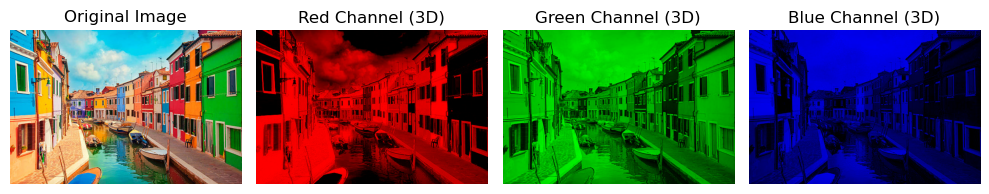

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Downloads/island.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   
red_image = np.zeros_like(image)                                          
red_image[:, :, 0] = image_rgb[:, :, 0]                                    
                                                                           
green_image = np.zeros_like(image)  
green_image[:, :, 1] = image_rgb[:, :, 1]  

blue_image = np.zeros_like(image)  
blue_image[:, :, 2] = image_rgb[:, :, 2]  


plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(red_image)
plt.title("Red Channel (3D)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(green_image)
plt.title("Green Channel (3D)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(blue_image)
plt.title("Blue Channel (3D)")
plt.axis("off")



plt.tight_layout()
plt.show()

(-0.5, 611.5, 407.5, -0.5)

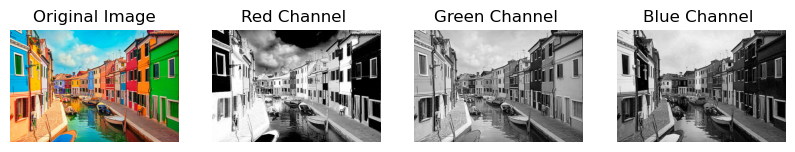

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Downloads/island.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
red_channel = image_rgb[:, :, 0]  

green_channel = image_rgb[:, :, 1]  

blue_channel = image_rgb[:, :, 2]  
plt.figure(figsize=(10, 5))


plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(red_channel,cmap='gray')
plt.title("Red Channel ")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(green_channel,cmap='gray')
plt.title("Green Channel ")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(blue_channel,cmap='gray')
plt.title("Blue Channel ")
plt.axis("off")


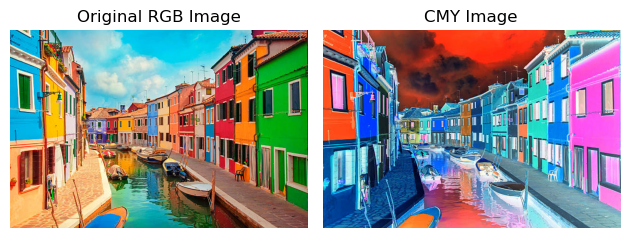

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_cmy(image):
    image = image / 255.0
    
    C = 1 - image[:, :, 2]  
    M = 1 - image[:, :, 1]  
    Y = 1 - image[:, :, 0]  
    
    cmy_image = np.stack((C, M, Y), axis=-1)
    
    cmy_image = (cmy_image * 255).astype(np.uint8)
    
    return cmy_image

image = cv2.imread('Downloads/island.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

cmy_image = rgb_to_cmy(image)


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cmy_image)
plt.title("CMY Image")
plt.axis("off")

plt.tight_layout()
plt.show()


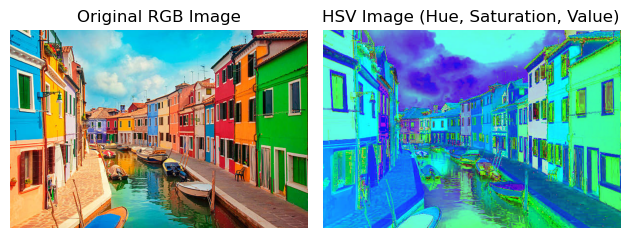

In [64]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('Downloads/island.jpg')
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB) 

image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title("HSV Image (Hue, Saturation, Value)")
plt.axis("off")

plt.tight_layout()
plt.show()


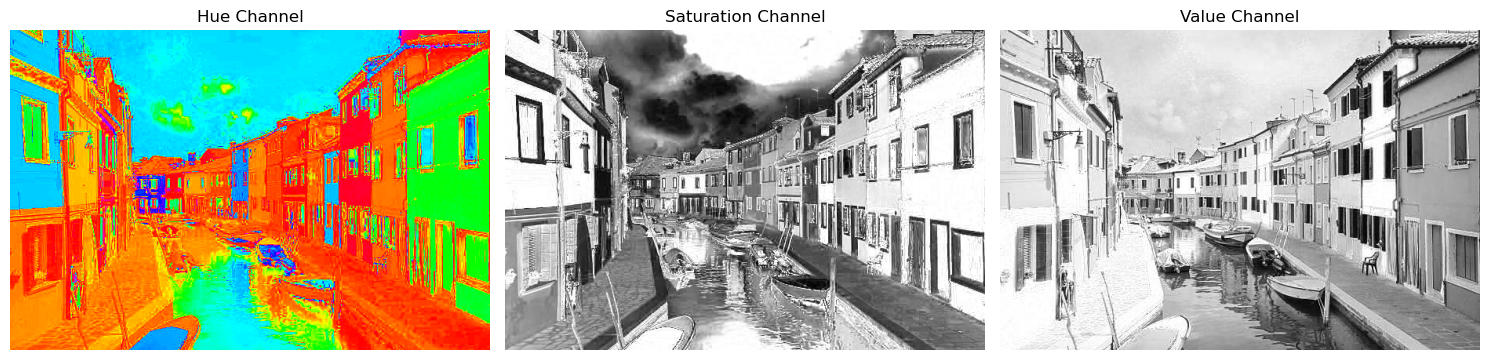

In [68]:
H, S, V = cv2.split(image_hsv)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(H,cmap='hsv') 
plt.title("Hue Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(S,cmap='gray')  
plt.title("Saturation Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(V,cmap='gray')  
plt.title("Value Channel")
plt.axis("off")

plt.tight_layout()
plt.show()


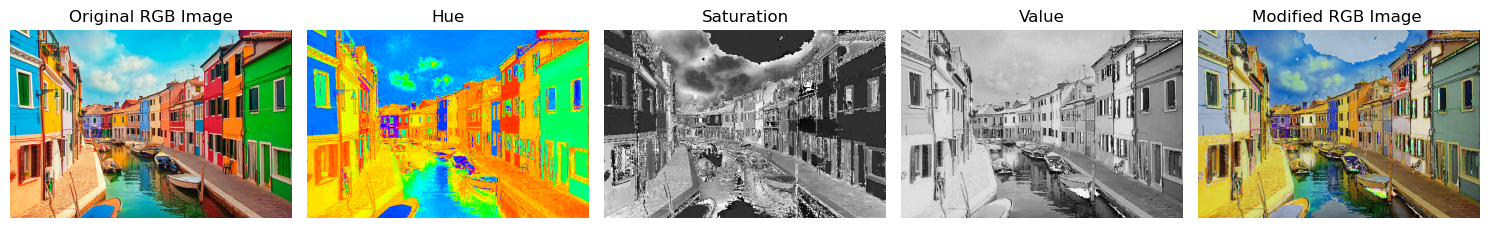

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Downloads/island.jpg')
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  

image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(image_hsv)

# Increase Hue by 10 (wrap around at 179)
H = (H + 10) % 180

# Increase Saturation by 50 (clamp to 255)
S = np.clip(S + 50, 0, 255)

# Decrease Value by 30 (clamp to 0)
V = np.clip(V - 30, 0, 255)

modified_hsv = cv2.merge([H, S, V])

modified_rgb = cv2.cvtColor(modified_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(H,cmap='hsv')
plt.title("Hue")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(S,cmap='gray')
plt.title("Saturation")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(V,cmap='gray')
plt.title("Value")
plt.axis("off")


plt.subplot(1, 5, 5)
plt.imshow(modified_rgb)
plt.title("Modified RGB Image ")
plt.axis("off")


plt.tight_layout()
plt.show()
